- Topics:
    1. Simple Moving Average (Exil + coding)
    2. Cumalitive Moving average
    3. Exponintal Weight Moving Avg
    4. Moving Avg (formula)--> ACF  'MA'
    5. AutoRegression Model -->PACF  'AR' (ARMA)

In [1]:
import pandas_datareader as pdr
from datetime import datetime
import pandas as pd

In [2]:
df_tesla = pdr.get_data_yahoo('TSLA')
df_tesla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-03-01,50.970001,49.821999,50.835999,50.004002,24047500.0,50.004002
2017-03-02,50.655998,49.653999,49.942001,50.096001,16759000.0,50.096001
2017-03-03,50.380001,49.799999,50.147999,50.313999,14597000.0,50.313999
2017-03-06,50.340000,49.501999,49.582001,50.242001,16777500.0,50.242001
2017-03-07,50.778000,49.664001,50.383999,49.717999,17297500.0,49.717999
...,...,...,...,...,...,...
2022-02-22,856.729980,801.099976,834.130005,821.530029,27762700.0,821.530029
2022-02-23,835.299988,760.559998,830.429993,764.039978,31752300.0,764.039978
2022-02-24,802.479980,700.000000,700.390015,800.770020,45107400.0,800.770020


#### Simple Moving Average

In [3]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,6)

<AxesSubplot:xlabel='Date'>

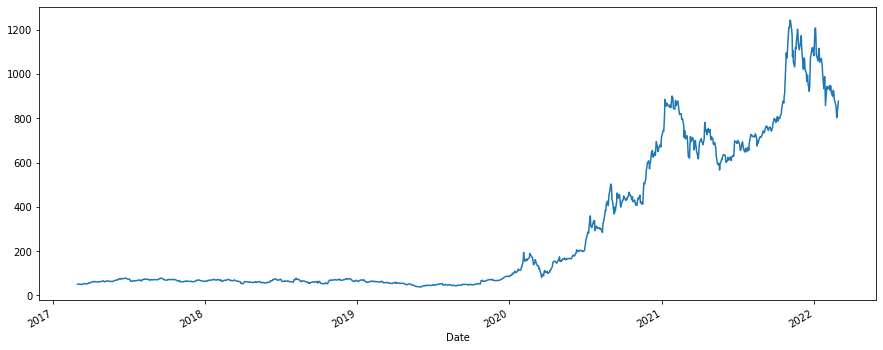

In [4]:
df_tesla.High.plot(figsize = (15,6))

<AxesSubplot:xlabel='Date'>

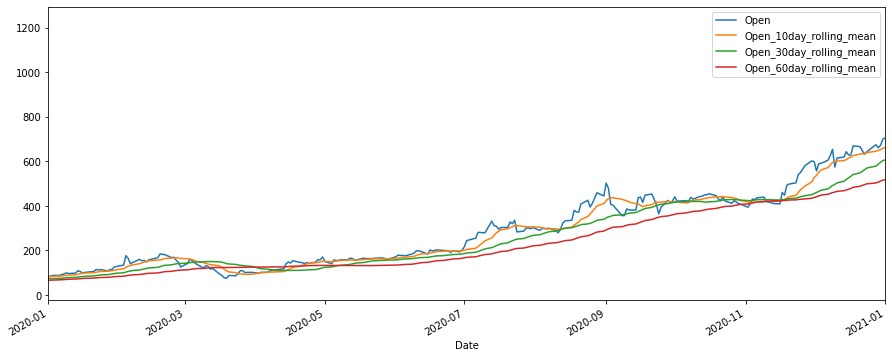

In [5]:
df_tesla['Open_10day_rolling_mean'] = df_tesla.Open.rolling(10,min_periods=1).mean()
df_tesla['Open_30day_rolling_mean'] = df_tesla.Open.rolling(30,min_periods=1).mean()
df_tesla['Open_60day_rolling_mean'] = df_tesla.Open.rolling(60,min_periods=1).mean()
df_tesla[['Open', 'Open_10day_rolling_mean','Open_30day_rolling_mean','Open_60day_rolling_mean']].plot(figsize=(15,6),xlim=['2020-01-01','2021-01-01'])

- Disadvantage with SMAvg:
    1. We are Giving Similar important to all the data, insted to give imp. to New data
    2. More Weight should be given in the resent data so using Exponental Moving avg

#### Cuumelative Moving Average

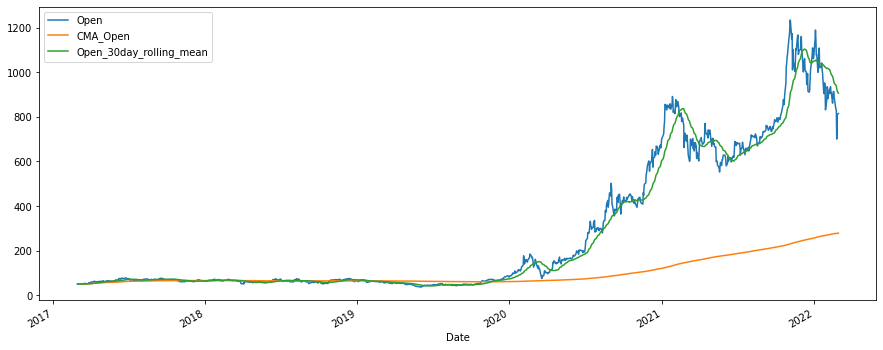

In [6]:
df_tesla['CMA_Open']=df_tesla.Open.expanding(min_periods=5).mean()
df_tesla[['Open','CMA_Open','Open_30day_rolling_mean']].plot(figsize = (15,6));

#### Exponential Weighted Moving Average

Our Focus should be in more in recent data instad in all data

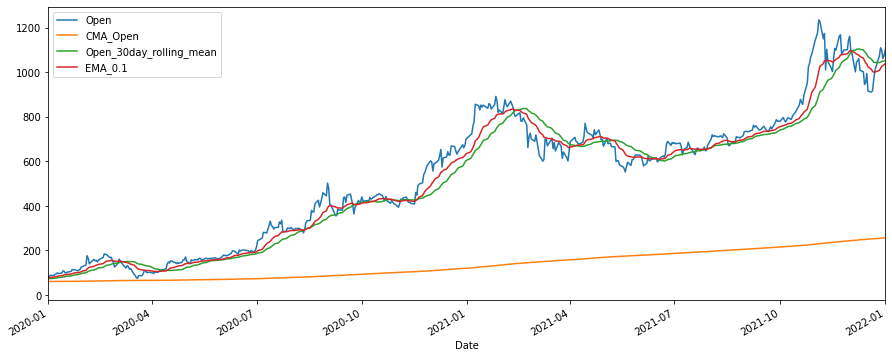

In [7]:
#Exponential Moving Average(EMA)
df_tesla['EMA_0.1'] = df_tesla.Open.ewm(alpha=0.1,adjust=False).mean()
df_tesla[['Open','CMA_Open','Open_30day_rolling_mean','EMA_0.1']].plot(figsize = (15,6),xlim=['2020-01-01','2022-01-01']);

#### Exponental Weighted Moving Average

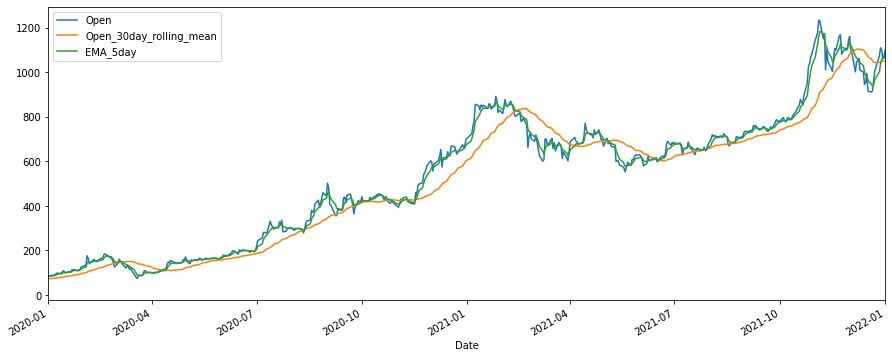

In [9]:
df_tesla['EMA_5day'] = df_tesla.Open.ewm(span=5).mean()
df_tesla[['Open','Open_30day_rolling_mean','EMA_5day']].plot(figsize=(15,6),xlim=['2020-01-01','2022-01-01']);